## Questionário 5: Detecção de comunidades

Nome: Aimê G. da Nobrega

Nro USP: 11882429

Disciplina: Redes Complexas (SME0130)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
np.random.seed(50)

In [2]:
from networkx.algorithms.community import greedy_modularity_communities

In [3]:
import community as community_louvain

In [4]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

In [5]:
def ler_G(endereco):
    G= nx.read_edgelist(endereco, nodetype=int)
    # nodes_original = G.nodes
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    return G

In [6]:
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'white']

### 1 -Calcule a modularidade para a rede Jazz usando método fastgreedy.

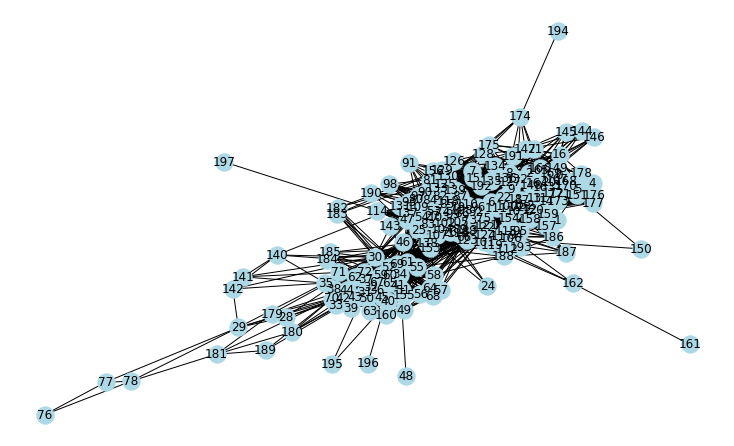

In [7]:
G = ler_G("data/jazz.txt")

pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

In [8]:
communities = list(greedy_modularity_communities(G))
# for k in range(0,len(communities)):
#     print('Community',k,':', sorted(communities[k]))

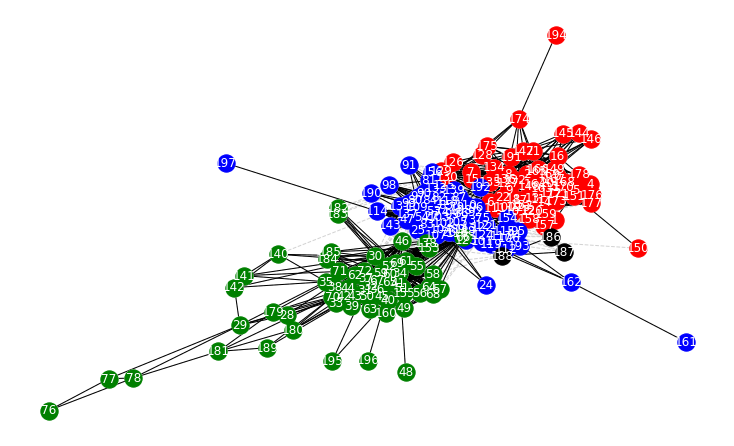

In [9]:
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
# plt.savefig('Jazz.eps') #save the figure into a file
plt.show(True)

In [10]:
c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc 
    nc = nc+1
#     print('Community:', sorted(c[k]))
# print(communities)

In [11]:
print("Modularity Q = ", modularity(G,communities))

Modularity Q =  0.4389078153753761


### 2 -Calcule a modularidade para a rede Jazz usando método Louvain.

In [12]:
partition = community_louvain.best_partition(G)

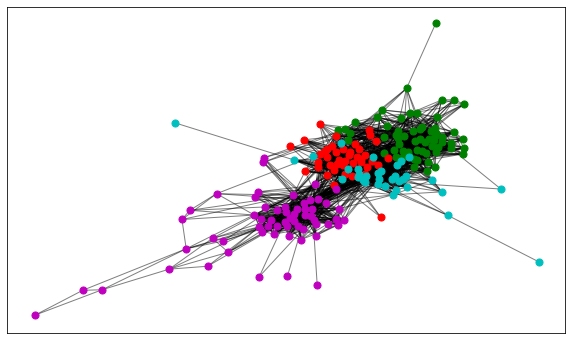

In [13]:
#drawing
fig= plt.figure(figsize=(10,6))
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [14]:
print("Modularity Q = ", modularity(G,partition))

Modularity Q =  0.44021125576638676


### 3 -Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para 𝜇= 0.05, 𝜇= 0.1 e 𝜇= 0.2. Use o algoritmo de Louvain.

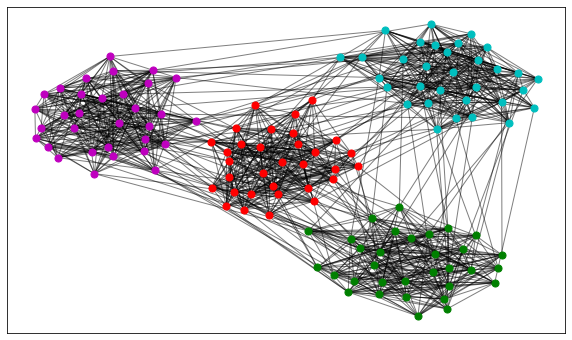

Modularity Q para mu 0.05 =  0.643639535397838


In [15]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.05

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
# fig= plt.figure(figsize=(10,6))
# nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
# plt.show(True)

partition = community_louvain.best_partition(G)
#drawing
fig= plt.figure(figsize=(10,6))
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

print("Modularity Q para mu 0.05 = ", modularity(G,partition))

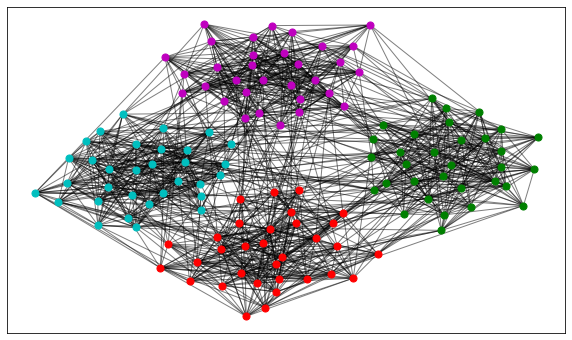

Modularity Q para mu 0.1 =  0.5427818606053953


In [16]:
mu = 0.1

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
# fig= plt.figure(figsize=(10,6))
# nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
# plt.show(True)

partition = community_louvain.best_partition(G)
#drawing
fig= plt.figure(figsize=(10,6))
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

print("Modularity Q para mu 0.1 = ", modularity(G,partition))

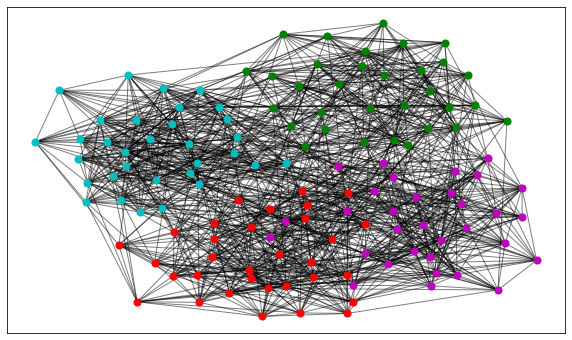

Modularity Q para mu 0.2 =  0.44487909975820294


In [17]:
mu = 0.2

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
# fig= plt.figure(figsize=(10,6))
# nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
# plt.show(True)

partition = community_louvain.best_partition(G)
#drawing
fig= plt.figure(figsize=(10,6))
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

print("Modularity Q para mu 0.2 = ", modularity(G,partition))

### 4-Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para 𝜇= 0.05, 𝜇= 0.1 e 𝜇= 0.2. Use o algoritmo fastgreedy.


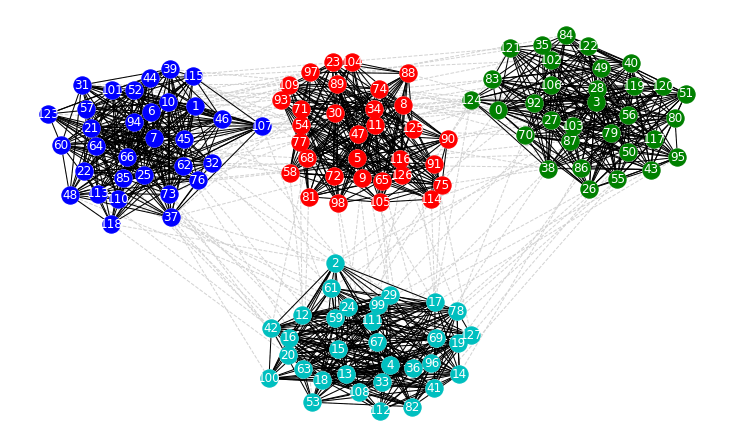

Modularity Q para mu 0.05 =  0.643639535397838


In [18]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.05

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
# fig= plt.figure(figsize=(10,6))
# nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
# plt.show(True)

communities = list(greedy_modularity_communities(G))
# for k in range(0,len(communities)):
#     print('Community',k,':', sorted(communities[k]))

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.savefig('Jazz.eps') #save the figure into a file
plt.show(True)

c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc 
    nc = nc+1
#     print('Community:', sorted(c[k]))
# print(communities)

print("Modularity Q para mu 0.05 = ", modularity(G,communities))

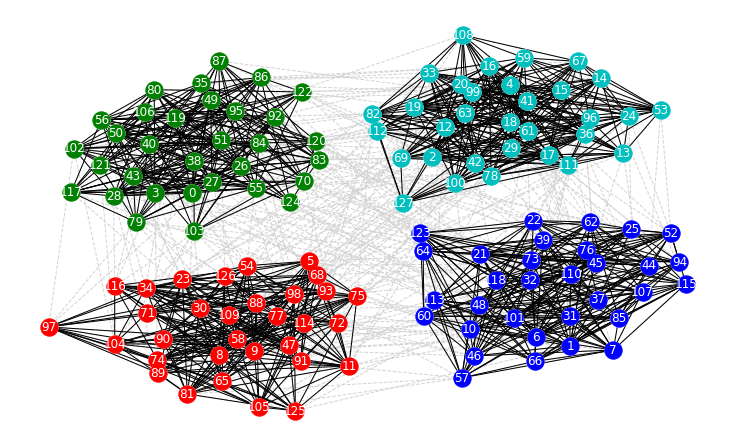

Modularity Q para mu 0.1 =  0.5427818606053953


In [24]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.1

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
# fig= plt.figure(figsize=(10,6))
# nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
# plt.show(True)

communities = list(greedy_modularity_communities(G))
# for k in range(0,len(communities)):
#     print('Community',k,':', sorted(communities[k]))

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.savefig('Jazz.eps') #save the figure into a file
plt.show(True)

c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc 
    nc = nc+1
#     print('Community:', sorted(c[k]))
# print(communities)

print("Modularity Q para mu 0.1 = ", modularity(G,communities))

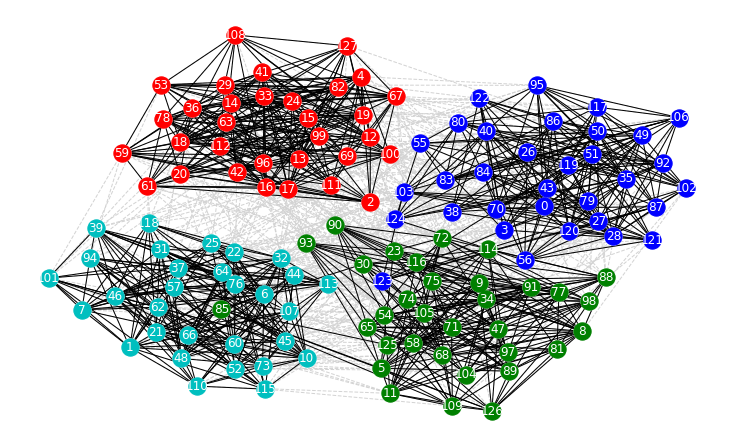

Modularity Q para mu 0.2 =  0.4349088598177227


In [25]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.2

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
# fig= plt.figure(figsize=(10,6))
# nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
# plt.show(True)

communities = list(greedy_modularity_communities(G))
# for k in range(0,len(communities)):
#     print('Community',k,':', sorted(communities[k]))

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.savefig('Jazz.eps') #save the figure into a file
plt.show(True)

c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc 
    nc = nc+1
#     print('Community:', sorted(c[k]))
# print(communities)

print("Modularity Q para mu 0.2 = ", modularity(G,communities))